# Forecasting with pandas
Pandas is an open-source library for Python which provides high-performance and easy-to-use data structures. It is widely used in finance and economics because of its time series data analysis capabilities. It also has functunality of reading from and writing to different file formats, reshaping and pivoting of data sets and data splicing, merging, joining and merging. The name "pandas" stems from "panel data", an econometrics term for  Moreover, a pandas spin-off called pandas-datareader allows one to easily import data from online servers. This includes, but is not limitied to, stock information from Yahoo! and Google, economic indicators from the World Bank and statistics from OECD and Eurostat.

## Pandas datastructures
DISCLAIMER: this section is somewhat tediuous.

The pandas library makes use of some special data structures: `Series` and `DataFrame`. We will have a quick look at them now. First we need to import the necessities

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

`Series` is a one-dimensional labeled array capable of holding any data type. The axis lables are collectively reffered to as the **index**. Now to construct a series filled with random numbers and index them with letters.

In [23]:
# Construction Series
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

# Displaying
s

a    0.715136
b    0.495262
c   -1.470195
d   -1.783993
e    1.015452
dtype: float64

Numerous operations can be applied to this data structure.

In [24]:
# Setting a new value with index "f"
s['f'] = 2

# Setting a new value with index "something"
s['something'] = 42

# What do we have now?
s

# Displaying everything larger than 0.5
s[s > 0.5]

a             0.715136
e             1.015452
f             2.000000
something    42.000000
dtype: float64

In [25]:
# Descriptive statistics
s.describe()

count     7.000000
mean      6.138809
std      15.871028
min      -1.783993
25%      -0.487467
50%       0.715136
75%       1.507726
max      42.000000
dtype: float64

### DataFrame
`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. One can think of it like a spreadsheet or SQL table. Here is an example of use.

In [26]:
# Constructing DateTimeIndex object
dates = pd.date_range('20170101', periods=6)

# What is this?
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
# Constructing DataFrame
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

# Showing
df

,A,B,C,D
2017-01-01,0.064447,1.257437,-0.064547,-0.531393
2017-01-02,0.857991,-0.054488,-0.082684,-1.177214
2017-01-03,1.278102,-0.692164,1.057963,1.179457
2017-01-04,0.022923,0.680302,2.044884,-0.160848
2017-01-05,-0.338903,0.179928,-1.369569,-0.039407
2017-01-06,1.346018,1.481908,0.349840,-1.586526


In [28]:
# Show statistic summary of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.538430,0.475487,0.322648,-0.385989
std,0.715759,0.824368,1.156316,0.970556
min,-0.338903,-0.692164,-1.369569,-1.586526
25%,0.033304,0.004116,-0.078150,-1.015759
50%,0.461219,0.430115,0.142646,-0.346120
75%,1.173074,1.113153,0.880932,-0.069768
max,1.346018,1.481908,2.044884,1.179457


In [29]:
# Sorting by value
df.sort_values(by='B')

,A,B,C,D
2017-01-03,1.278102,-0.692164,1.057963,1.179457
2017-01-02,0.857991,-0.054488,-0.082684,-1.177214
2017-01-05,-0.338903,0.179928,-1.369569,-0.039407
2017-01-04,0.022923,0.680302,2.044884,-0.160848
2017-01-01,0.064447,1.257437,-0.064547,-0.531393
2017-01-06,1.346018,1.481908,0.349840,-1.586526


In [30]:
# Label slicing
df.loc['20170102':'20170104', ['B','D']]

,B,D
2017-01-02,-0.054488,-1.177214
2017-01-03,-0.692164,1.179457
2017-01-04,0.680302,-0.160848


## Importing Stock Data with pandas-datareader
`pandas-datareader` is enables one to import data from online databases such as Yahoo! Finance, Google Finace, Quandl, FRED, OECD and the World Bank. Functions from `pandas_datareader.data` and `pandas_datareader.wb` extract the data from the various Internet source into a pandas `DataFrame`. As a first exampel, let us get historical stock prices from Yahoo! Finance. 

In [16]:
import pandas_datareader.data as web
import datetime

# Start and end date for data import.
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2017, 1, 1)

# Importing data. 
# First and second argument is stock ticker and source respectivelye
american_airlines = web.DataReader("AAL", 'google', start_date, end_date)

# Showing data from a particular day
print("American Airlines")
american_airlines.loc['20161004']

American Airlines


Open           38.39
High           38.78
Low            37.55
Close          37.63
Volume    9065626.00
Name: 2016-10-04 00:00:00, dtype: float64

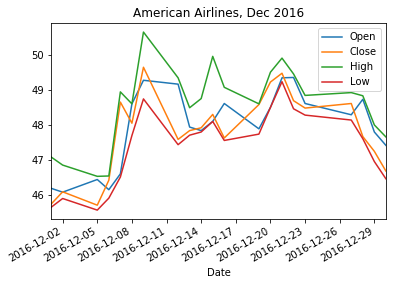

In [27]:
from matplotlib import pyplot as plt

# Plotting close, high and low for December 2016
american_airlines.loc['20161201':'20161231',['Open', 'Close', 'High', 'Low']].plot()
plt.title("American Airlines, Dec 2016")
plt.show()

This plot shows the opening and closing price of the stock, as well as the highest and lowest price during the day, for American airways in December of 2016. This plot is very messy, which why a "candlestick" plot is very common when plotting historical stock prices. This can be a bit tricky, as there is no built-in function in `pandas`, but is definitely possible. One must convert the dates to float values instead and use `matplotlib`.

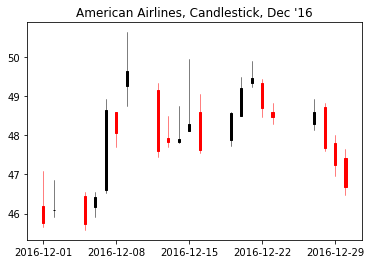

In [83]:
# Importing
from matplotlib.finance import candlestick_ohlc
from matplotlib import dates as mdates

# Creating new DataFrame for plotting Open, High, Low, Close candlesticks
aal_ohlc = american_airlines['20161201':'20161231'].reset_index()

# Removing volume column
aal_ohlc.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

# Converting dates column to float values
aal_ohlc['Date'] = aal_ohlc['Date'].map(mdates.date2num)

# Creating something to plot on
fig, ax = plt.subplots()

# Configuring x-axis to show dates
ax.xaxis_date()

# Plotting
candlestick_ohlc(ax, aal_ohlc.values)
plt.title("American Airlines, Candlestick, Dec '16")

plt.show()


This chart gives the same information to the analyst than as the one above. Each day is represented by a candlestick with a thick center (wax) and thin lines (wick) at the top and/or bottom. They also come in different colours; in this case they are red and black, but they may also be red and green, black and white or something else. A red candlestick, in this case, indicates that the stock has depreciated during the day (fallen), and a black candlestick indicates that the stock has appreciated (risen). The "wax" of the candlestick gives the opening and closing price of the stock. If the stock has the apprecieated the opening price is at the bottom of the wax and closing price on top. Vice versa for a depreciated stock; opening price on top of the wax and closing at the bottom. The ends of the "wicks" of the candlessticks indicates the highes and lowest stock price during intraday trading. This kind of chart may seem a bit strange the first time you see it, but one quickly becomes accustomed to it and realises the ease of used compared to the more traditional line plot above.